<a href="https://colab.research.google.com/github/vijivenkadesh/AI_ML/blob/main/insurance_forecast_by_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
insurance_data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print(insurance_data['region'].value_counts())
insurance_data['region'] = insurance_data['region'].astype('category')
print(insurance_data['region'].cat.categories)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object')


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cf = ColumnTransformer(transformers=[('encoding', OneHotEncoder(), ['sex', 'smoker', 'region'] )], remainder='passthrough')
df_new = pd.DataFrame(cf.fit_transform(insurance_data))

In [7]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520


In [8]:
insurance_oht = pd.get_dummies(insurance_data)
insurance_oht.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
X = insurance_oht.drop('charges', axis=1)
y = insurance_oht['charges']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [11]:
tf.random.set_seed(42)

In [12]:
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)
])

In [13]:
insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8742.5557 - mae: 8742.5557
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7868.9028 - mae: 7868.9028
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7551.3438 - mae: 7551.3438
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7613.4561 - mae: 7613.4561
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7621.9019 - mae: 7621.9019
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7582.0718 - mae: 7582.0718
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7548.2661 - mae: 7548.2661
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7739.8213 - mae: 7739.8213
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7479.7930 - mae: 7479.7930
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7778.8389 - mae: 7778.8389

In [14]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6412.9668 - mae: 6412.9668


[6412.966796875, 6412.966796875]

# Tuning the Model

#Optimizer Adam and Leraning rate added

In [15]:
tf.random.set_seed(42)

In [16]:
insurance_model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

In [17]:
insurance_model2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

In [18]:
history = insurance_model2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 12921.8662 - mae: 12921.8662
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 10444.9570 - mae: 10444.9570
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7661.3457 - mae: 7661.3457
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7436.3604 - mae: 7436.3604
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7359.3184 - mae: 7359.3184
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7295.0103 - mae: 7295.0103
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7209.3262 - mae: 7209.3262
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7131.4092 - mae: 7131.4092
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7047.4502 - mae: 7047.4502
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6959.2476 - mae: 6959.

In [19]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6412.9668 - mae: 6412.9668


[6412.966796875, 6412.966796875]

In [20]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3175.0688 - mae: 3175.0688


[3175.06884765625, 3175.06884765625]

Text(0, 0.5, 'loss')

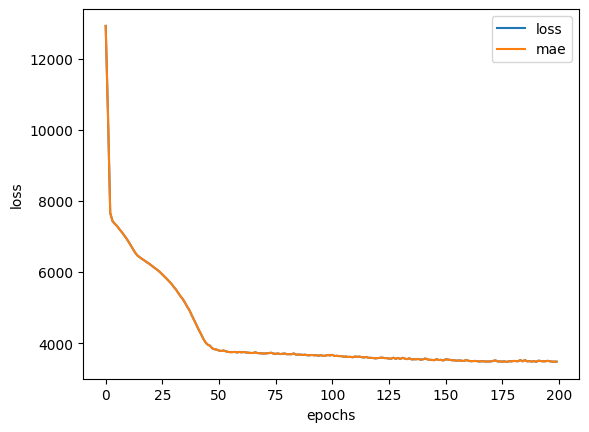

In [21]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

# Scaling the data

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
cf_scale = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), ['age', 'bmi', 'children'])], remainder='passthrough')
cf_scale.fit_transform(insurance_oht)

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.35270379, 0.        , ..., 1.        , 0.        ,
        0.        ]])